# mph

In [1]:
library(Seurat)
library(pheatmap)
library(purrr)
library(dplyr)
library(stringr)
library(harmony)

Attaching SeuratObject


载入程辑包：‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


载入需要的程辑包：Rcpp



In [2]:
top_genes = function(degs){
    rownames(degs) = NULL
    for (cluster in unique(degs$cluster)){
        message(cluster)
        print(degs[degs$cluster == cluster,] %>% arrange(desc(avg_log2FC)) %>% head(n=50))
    } 
}

In [3]:
mph = readRDS('~/HPV/res/public_rna/seurat_rds/annotated/mph.rds')

In [4]:
Idents(mph) = mph$minor
degs = FindAllMarkers(mph,logfc.threshold = 0.25,return.thresh = 0.05)

Calculating cluster Mph_CXCL9

Calculating cluster Mph_MKI67

Calculating cluster Mph_FOLR2

Calculating cluster Mph_SLC2A1

Calculating cluster Mph_FCN1

Calculating cluster others

Calculating cluster Mph_CCL20

Calculating cluster Mph_CD36

Calculating cluster Mph_SIGLEC1



In [5]:
top_genes(degs)

Mph_CXCL9



           p_val avg_log2FC pct.1 pct.2     p_val_adj   cluster     gene
1   2.004795e-11  3.4427433 0.112 0.041  3.816929e-07 Mph_CXCL9     IGHM
2   2.198208e-29  1.4939056 0.390 0.177  4.185169e-25 Mph_CXCL9    CXCL9
3   2.961938e-27  1.4707021 0.631 0.436  5.639234e-23 Mph_CXCL9    IFI27
4   3.871941e-63  1.4518319 0.818 0.535  7.371788e-59 Mph_CXCL9     C1QB
5   1.224684e-45  1.4121127 0.790 0.531  2.331676e-41 Mph_CXCL9    APOC1
6   1.970691e-64  1.4087116 0.850 0.574  3.751999e-60 Mph_CXCL9     C1QA
7   2.137372e-66  1.3555220 0.848 0.552  4.069343e-62 Mph_CXCL9     C1QC
8   3.105891e-79  1.2695267 0.904 0.847  5.913307e-75 Mph_CXCL9    PRDX1
9   1.287382e-35  1.2663675 0.813 0.587  2.451046e-31 Mph_CXCL9     SPP1
10 2.475771e-107  1.1118317 0.998 0.987 4.713621e-103 Mph_CXCL9   TMSB4X
11  5.218241e-69  1.1029542 0.890 0.809  9.935009e-65 Mph_CXCL9     CD81
12  7.749521e-33  1.0833546 0.790 0.552  1.475431e-28 Mph_CXCL9     APOE
13  5.986864e-52  1.0715670 0.787 0.756  1.139839e-

Mph_MKI67



           p_val avg_log2FC pct.1 pct.2     p_val_adj   cluster     gene
1  1.426738e-163   2.744647 0.945 0.216 2.716366e-159 Mph_MKI67    STMN1
2   6.781424e-94   2.454043 0.967 0.696  1.291115e-89 Mph_MKI67    H2AFZ
3  2.864719e-258   2.406117 0.760 0.056 5.454139e-254 Mph_MKI67    CENPF
4   0.000000e+00   2.364594 0.814 0.029  0.000000e+00 Mph_MKI67    MKI67
5   3.411064e-63   2.298814 0.732 0.260  6.494325e-59 Mph_MKI67 HIST1H4C
6   6.250853e-74   2.174459 0.902 0.457  1.190100e-69 Mph_MKI67    HMGB2
7   1.023625e-76   2.081819 0.945 0.665  1.948879e-72 Mph_MKI67     TUBB
8   1.049655e-81   2.081619 0.978 0.800  1.998438e-77 Mph_MKI67   TUBA1B
9   7.727730e-97   2.066147 1.000 0.892  1.471283e-92 Mph_MKI67    HMGB1
10  2.913682e-78   2.020914 0.956 0.701  5.547360e-74 Mph_MKI67    HMGN2
11 8.782718e-304   1.872795 0.743 0.039 1.672142e-299 Mph_MKI67    TOP2A
12  0.000000e+00   1.843432 0.809 0.045  0.000000e+00 Mph_MKI67    PCLAF
13  1.675124e-68   1.755321 0.421 0.066  3.189269e-

Mph_FOLR2



           p_val avg_log2FC pct.1 pct.2     p_val_adj   cluster     gene
1   6.860864e-15  2.1777924 0.245 0.133  1.306240e-10 Mph_FOLR2    IGLC3
2   2.928094e-16  2.0923863 0.380 0.238  5.574799e-12 Mph_FOLR2    IGLC2
3   1.592778e-28  1.8871779 0.242 0.100  3.032491e-24 Mph_FOLR2     MT1G
4   3.753698e-13  1.7098669 0.365 0.244  7.146666e-09 Mph_FOLR2    IGHG3
5  8.767678e-118  1.6393018 0.859 0.494 1.669278e-113 Mph_FOLR2    APOC1
6   5.351938e-23  1.5876198 0.115 0.032  1.018955e-18 Mph_FOLR2     MT1H
7  1.885659e-120  1.5768080 0.879 0.512 3.590105e-116 Mph_FOLR2     APOE
8   2.645783e-82  1.4213314 0.734 0.386  5.037305e-78 Mph_FOLR2   RNASE1
9  7.750444e-133  1.3505968 0.902 0.547 1.475607e-128 Mph_FOLR2    GPNMB
10 5.849189e-150  1.3435828 0.985 0.863 1.113627e-145 Mph_FOLR2     CTSD
11  7.742937e-50  1.3282992 0.356 0.129  1.474178e-45 Mph_FOLR2    CCL18
12  1.263913e-24  1.2804030 0.324 0.170  2.406365e-20 Mph_FOLR2    MMP12
13  6.303719e-66  1.2627676 0.831 0.563  1.200165e-

Mph_SLC2A1



          p_val avg_log2FC pct.1 pct.2    p_val_adj    cluster      gene
1  5.582910e-72  1.9904892 0.936 0.786 1.062930e-67 Mph_SLC2A1     HSPH1
2  7.247072e-37  1.8148110 0.692 0.453 1.379770e-32 Mph_SLC2A1     HSPA6
3  4.633084e-60  1.7347139 0.788 0.470 8.820929e-56 Mph_SLC2A1      BAG3
4  9.105804e-51  1.7150433 0.398 0.118 1.733654e-46 Mph_SLC2A1  SERPINE1
5  5.343983e-40  1.7048234 0.645 0.369 1.017441e-35 Mph_SLC2A1    SNAPC1
6  6.612633e-51  1.6523618 0.392 0.117 1.258979e-46 Mph_SLC2A1    HILPDA
7  3.542482e-34  1.6451855 0.695 0.462 6.744531e-30 Mph_SLC2A1 HIF1A-AS3
8  1.189712e-37  1.5863286 0.895 0.787 2.265093e-33 Mph_SLC2A1     HSPD1
9  1.114949e-21  1.5558879 0.602 0.410 2.122752e-17 Mph_SLC2A1     USPL1
10 4.473623e-57  1.5405332 0.936 0.768 8.517331e-53 Mph_SLC2A1    DNAJB1
11 4.006495e-57  1.5153464 0.747 0.425 7.627966e-53 Mph_SLC2A1   ZFAND2A
12 3.210903e-19  1.4803326 0.622 0.461 6.113238e-15 Mph_SLC2A1      GBE1
13 7.436701e-27  1.4440567 0.360 0.153 1.415874e-22

Mph_FCN1



           p_val avg_log2FC pct.1 pct.2     p_val_adj  cluster     gene
1  7.129407e-163  2.7015485 0.583 0.146 1.357368e-158 Mph_FCN1 APOBEC3A
2   8.782066e-08  2.2167458 0.340 0.284  1.672017e-03 Mph_FCN1   CXCL10
3  2.550563e-120  1.9250520 0.928 0.730 4.856017e-116 Mph_FCN1   S100A8
4   3.750169e-16  1.8415586 0.474 0.391  7.139946e-12 Mph_FCN1    IFIT2
5  3.563819e-105  1.7064790 0.953 0.886 6.785154e-101 Mph_FCN1   S100A9
6  9.518021e-165  1.6907238 0.753 0.255 1.812136e-160 Mph_FCN1     FCN1
7   8.266251e-16  1.6761160 0.554 0.516  1.573812e-11 Mph_FCN1  TNFSF10
8   2.228551e-99  1.6458421 0.941 0.820  4.242938e-95 Mph_FCN1    TIMP1
9   3.584866e-06  1.5933958 0.208 0.148  6.825226e-02 Mph_FCN1     CCL8
10  2.278379e-19  1.5194865 0.185 0.078  4.337806e-15 Mph_FCN1   CXCL11
11  1.623069e-04  1.4996364 0.391 0.351  1.000000e+00 Mph_FCN1     CCL2
12 3.895215e-106  1.3887864 0.848 0.523 7.416100e-102 Mph_FCN1 SLC25A37
13  1.533355e-26  1.3656056 0.570 0.450  2.919354e-22 Mph_FCN1  

others



           p_val avg_log2FC pct.1 pct.2     p_val_adj cluster     gene
1   6.665656e-27  2.5801750 0.409 0.050  1.269074e-22  others     GNLY
2  1.788055e-296  1.9827635 0.795 0.012 3.404279e-292  others     CD3D
3   1.373898e-22  1.9801992 0.182 0.012  2.615765e-18  others   CXCL13
4   4.845020e-50  1.9724026 0.864 0.126  9.224434e-46  others     IL32
5   7.482881e-24  1.9581450 0.750 0.205  1.424666e-19  others     CCL5
6  1.570209e-258  1.8780643 0.795 0.015 2.989520e-254  others     TRAC
7  9.266811e-102  1.8730396 0.500 0.018  1.764308e-97  others     GZMA
8   2.256673e-63  1.6575063 0.432 0.023  4.296479e-59  others     GZMB
9  4.872465e-135  1.6393125 0.750 0.032 9.276685e-131  others      CD2
10 2.544029e-229  1.4727647 0.750 0.015 4.843577e-225  others    TRBC2
11  6.715601e-08  1.3979248 0.477 0.180  1.278583e-03  others     NKG7
12  0.000000e+00  1.3706446 0.750 0.006  0.000000e+00  others     CD3G
13 9.241990e-155  1.3561926 0.795 0.030 1.759582e-150  others    CD247
14  3.

Mph_CCL20



           p_val avg_log2FC pct.1 pct.2     p_val_adj   cluster       gene
1  2.252273e-106   3.202406 0.362 0.060 4.288102e-102 Mph_CCL20      CXCL5
2   3.969383e-51   2.973513 0.111 0.009  7.557309e-47 Mph_CCL20       PPBP
3   1.626765e-92   2.525100 0.623 0.231  3.097198e-88 Mph_CCL20      CCL20
4  1.475691e-124   2.511015 0.798 0.330 2.809567e-120 Mph_CCL20      CXCL3
5  2.014645e-111   2.247951 0.603 0.183 3.835683e-107 Mph_CCL20      INHBA
6  3.150713e-127   2.096542 0.775 0.303 5.998642e-123 Mph_CCL20       PID1
7  5.586388e-109   2.065877 0.943 0.633 1.063592e-104 Mph_CCL20      CXCL8
8   6.546279e-33   2.006165 0.399 0.183  1.246346e-28 Mph_CCL20      CXCL1
9   9.482084e-94   1.927182 0.962 0.821  1.805294e-89 Mph_CCL20      TIMP1
10 6.226752e-126   1.896644 0.496 0.103 1.185511e-121 Mph_CCL20    SLC7A11
11  1.665190e-73   1.889785 0.858 0.588  3.170355e-69 Mph_CCL20       IL1B
12 1.644341e-131   1.885730 0.824 0.360 3.130661e-127 Mph_CCL20       SDC2
13  1.572757e-89   1.6964

Mph_CD36



          p_val avg_log2FC pct.1 pct.2    p_val_adj  cluster       gene
1  4.729590e-89  1.3028071 0.822 0.480 9.004666e-85 Mph_CD36      NR4A3
2  7.676243e-61  1.2359977 0.939 0.845 1.461480e-56 Mph_CD36     ATP1B3
3  7.063382e-81  1.2227021 0.819 0.509 1.344797e-76 Mph_CD36       AOAH
4  1.726731e-38  1.2212600 0.458 0.224 3.287524e-34 Mph_CD36       AREG
5  1.427336e-85  1.1942518 0.867 0.543 2.717505e-81 Mph_CD36    DENND4A
6  8.210994e-23  1.1822293 0.460 0.303 1.563291e-18 Mph_CD36   ARHGAP24
7  1.112027e-53  1.1660303 0.817 0.618 2.117188e-49 Mph_CD36     RANBP2
8  2.548869e-53  1.1009942 0.811 0.603 4.852792e-49 Mph_CD36     ZNF331
9  1.363703e-79  1.0754771 0.650 0.314 2.596354e-75 Mph_CD36      PRMT9
10 1.461389e-53  1.0462747 0.613 0.325 2.782338e-49 Mph_CD36      TEX14
11 7.674228e-66  1.0412633 0.977 0.820 1.461096e-61 Mph_CD36     SLC8A1
12 4.653976e-55  1.0373156 0.788 0.527 8.860704e-51 Mph_CD36      REV3L
13 2.556224e-79  1.0158834 0.746 0.400 4.866796e-75 Mph_CD36    

Mph_SIGLEC1



           p_val avg_log2FC pct.1 pct.2     p_val_adj     cluster       gene
1  2.069268e-257  2.0254084 0.897 0.313 3.939679e-253 Mph_SIGLEC1     FRMD4A
2  6.900429e-140  1.8599909 0.784 0.356 1.313773e-135 Mph_SIGLEC1      DLEU1
3  4.019175e-234  1.8193725 0.810 0.212 7.652107e-230 Mph_SIGLEC1    LNCAROD
4  1.457897e-183  1.7612546 0.976 0.619 2.775690e-179 Mph_SIGLEC1      FMNL2
5  1.285917e-191  1.6855178 0.906 0.405 2.448258e-187 Mph_SIGLEC1      MERTK
6  4.642075e-153  1.5276769 0.705 0.230 8.838046e-149 Mph_SIGLEC1     KCNMA1
7  4.963089e-178  1.5186675 0.650 0.168 9.449224e-174 Mph_SIGLEC1       BNC2
8  4.847186e-161  1.5179353 0.970 0.660 9.228558e-157 Mph_SIGLEC1      TCF12
9  3.471715e-136  1.5159494 0.593 0.175 6.609797e-132 Mph_SIGLEC1      CADM1
10 3.620555e-110  1.4773218 0.569 0.192 6.893175e-106 Mph_SIGLEC1      MACC1
11 2.283801e-158  1.4679101 0.774 0.290 4.348128e-154 Mph_SIGLEC1       FHIT
12 3.982128e-130  1.4519950 0.922 0.516 7.581573e-126 Mph_SIGLEC1     SPRED1

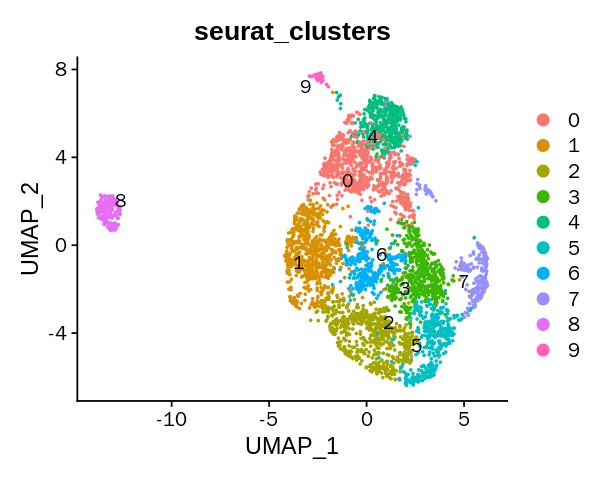

In [6]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(mph, group.by = 'seurat_clusters', label = TRUE,repel = TRUE)

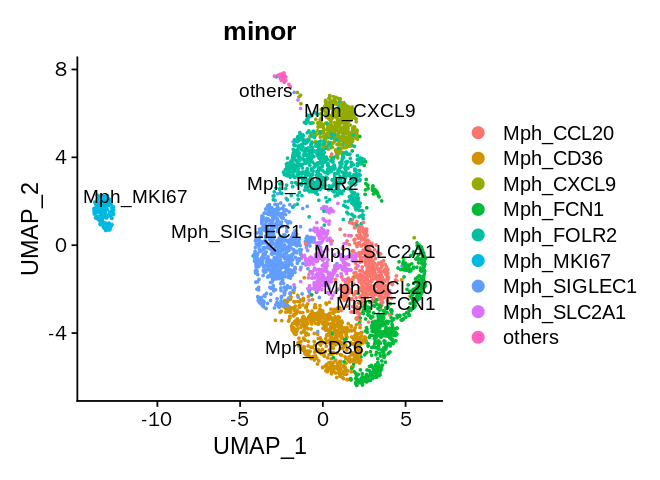

In [7]:
options(repr.plot.width = 5.5, repr.plot.height = 4)
DimPlot(mph, group.by = 'minor', label = TRUE,repel = TRUE)

In [8]:
unique(mph$minor)

[1] "Mph_CXCL9"   "Mph_MKI67"   "Mph_FOLR2"   "Mph_SLC2A1"  "Mph_FCN1"   
[6] "others"      "Mph_CCL20"   "Mph_CD36"    "Mph_SIGLEC1"

In [78]:
Idents(mph) = mph$seurat_clusters
degs_5 = FindMarkers(mph,ident.1 = '5',logfc.threshold = 0.25,,return.thresh = 0.05)
degs_7 = FindMarkers(mph,ident.1 = '7',logfc.threshold = 0.25,,return.thresh = 0.05)

In [82]:
degs_5 %>% arrange(desc(avg_log2FC)) %>% head(n=50)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
VCAN,1.043471e-108,1.6870939,0.911,0.457,1.986664e-104
S100A8,1.297708e-71,1.6870796,0.922,0.743,2.470706e-67
TIMP1,1.055879e-72,1.6459840,0.950,0.826,2.010288e-68
S100A9,3.287507e-71,1.6434309,0.953,0.890,6.259085e-67
THBS1,1.882268e-37,1.5716886,0.441,0.187,3.583649e-33
FCN1,4.323438e-105,1.5175591,0.768,0.285,8.231394e-101
SLC25A37,9.953465e-88,1.5113576,0.888,0.539,1.895040e-83
JARID2,8.367961e-58,1.4855188,0.927,0.755,1.593176e-53
PPIF,3.056433e-52,1.4645628,0.822,0.676,5.819143e-48


In [83]:
degs_7 %>% arrange(desc(avg_log2FC)) %>% head(n=50)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CXCL10,1.265930e-98,3.642298,0.799,0.262,2.410204e-94
APOBEC3A,3.670097e-113,3.223674,0.725,0.180,6.987498e-109
CCL8,9.984267e-68,2.921311,0.533,0.135,1.900905e-63
IFIT2,2.372412e-93,2.864332,0.873,0.375,4.516836e-89
CCL2,2.823343e-53,2.809744,0.738,0.335,5.375363e-49
TNFSF10,3.952134e-90,2.763744,0.904,0.499,7.524468e-86
CXCL11,7.155114e-95,2.645897,0.463,0.072,1.362262e-90
CCL7,1.857391e-36,2.485679,0.376,0.107,3.536286e-32
ISG15,4.718218e-80,2.447198,0.978,0.770,8.983015e-76


In [88]:
mph$curated = mph$minor
mph$curated[mph$curated == 'Mph_SIGLEC1'] = 'Mph_MERTK'
mph$curated[mph$curated == 'Mph_CD36'] = 'Mph_NR4A3'
mph$curated[mph$seurat_clusters %in% c(5)] = 'Mph_VCAN'
mph$curated[mph$seurat_clusters %in% c(7)] = 'Mph_CXCL10'

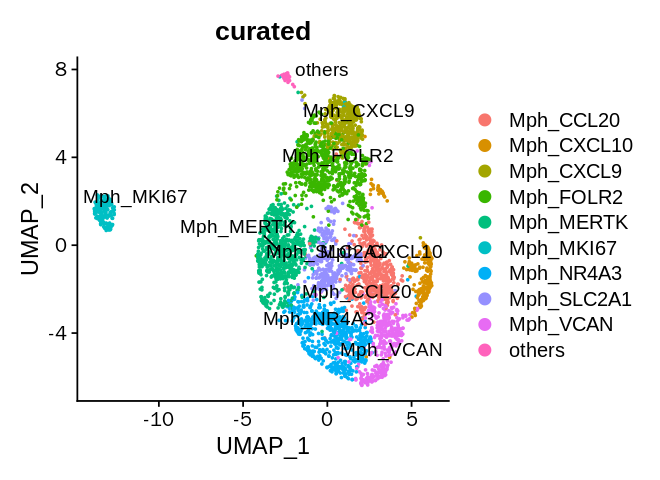

In [89]:
options(repr.plot.width = 5.5, repr.plot.height = 4)
DimPlot(mph, group.by = 'curated', label = TRUE,repel = TRUE)

In [90]:
saveRDS(mph,file = '~/HPV/res/public_rna/seurat_rds/annotated/mph.rds')